In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
with open("multiBlock32.csv", "r") as file:
    multiBlock32 = pd.read_csv("multiBlock32.csv", header = None)
    multiBlock32.pop(258)
    multiBlock32.pop(257)
    multiBlock32.pop(0)
    multiBlock32 = np.array(multiBlock32)
print(multiBlock32)
print(multiBlock32.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(64, 256)


In [12]:
errors = np.zeros((32, 256))
print(errors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
errors[0] = multiBlock32[1] - multiBlock32[0]
print(errors)
print(np.where(errors[0] != 0))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(array([ 61, 137, 153, 154, 169, 187, 188, 193, 194, 195, 209], dtype=int64),)


In [24]:
ind = 0
for i in range(0, multiBlock32.shape[0], 2):
    errors[ind] = multiBlock32[i+1]-multiBlock32[i]
    ind += 1
print(errors)
print(errors.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32, 256)


In [28]:
for i in range(errors.shape[0]):
    print(np.where(errors[i] >= 1))

(array([193, 209], dtype=int64),)
(array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230], dtype=int64),)
(array([184, 207, 214, 218, 238, 242], dtype=int64),)
(array([195], dtype=int64),)
(array([145, 150], dtype=int64),)
(array([], dtype=int64),)
(array([148], dtype=int64),)
(array([123, 175], dtype=int64),)
(array([], dtype=int64),)
(array([122], dtype=int64),)
(array([177], dtype=int64),)
(array([106, 145, 152, 154, 173, 187, 230, 235], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([187], dtype=int64),)
(array([], dtype=int64),)
(array([154], dtype=int64),)
(array([194], dtype=int64),)
(array([164, 171], dtype=int64),)
(array([ 42, 162, 186, 229], dtype=int64),)
(array([ 90, 147, 171, 180, 194, 234], dtype=int64),)
(array([188, 195, 207, 218, 234], dtype=int64),)
(array([ 98, 172, 176, 238, 241], dtype=int64),)
(array([173], dtype=int64),)
(array([], dtype=int64),)
(array([130, 198, 213], dtype=int64),)
(array([], dtype=int64),)
(array([153], dtype=int

In [29]:
errorsDict = {}
for i in range(errors.shape[0]):
    errorsDict.update({i : (np.array(np.where(errors[i, :] >= 1))).flatten()})
print(errorsDict)

{0: array([193, 209], dtype=int64), 1: array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230], dtype=int64), 2: array([184, 207, 214, 218, 238, 242], dtype=int64), 3: array([195], dtype=int64), 4: array([145, 150], dtype=int64), 5: array([], dtype=int64), 6: array([148], dtype=int64), 7: array([123, 175], dtype=int64), 8: array([], dtype=int64), 9: array([122], dtype=int64), 10: array([177], dtype=int64), 11: array([106, 145, 152, 154, 173, 187, 230, 235], dtype=int64), 12: array([], dtype=int64), 13: array([], dtype=int64), 14: array([187], dtype=int64), 15: array([], dtype=int64), 16: array([154], dtype=int64), 17: array([194], dtype=int64), 18: array([164, 171], dtype=int64), 19: array([ 42, 162, 186, 229], dtype=int64), 20: array([ 90, 147, 171, 180, 194, 234], dtype=int64), 21: array([188, 195, 207, 218, 234], dtype=int64), 22: array([ 98, 172, 176, 238, 241], dtype=int64), 23: array([173], dtype=int64), 24: array([], dtype=int64), 25: array([130, 198, 213], dtype=int64), 26: ar

In [37]:
errorNums = np.zeros(len(errorsDict.keys()))
for i in range(len(errorsDict.keys())):
    errorNums[i] = errorsDict[i].shape[0]
print(errorNums)

[ 2. 10.  6.  1.  2.  0.  1.  2.  0.  1.  1.  8.  0.  0.  1.  0.  1.  1.
  2.  4.  6.  5.  5.  1.  0.  3.  0.  1.  0.  0.  8.  1.]


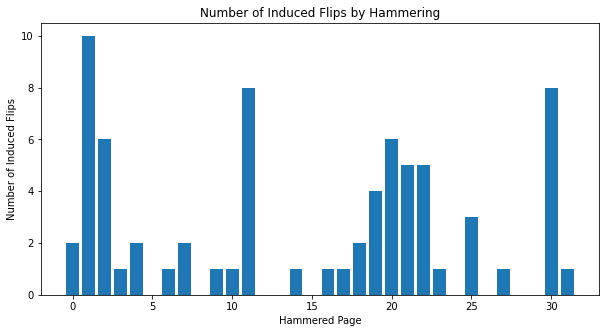

In [39]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errorsDict.keys(), errorNums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()